<a href="https://colab.research.google.com/github/ymaydias/Tech_challenge/blob/main/2%C2%BA_Tech_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas básicas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Captura da base de dados**

In [ ]:
df = pd.read_csv("Dados Históricos - Ibovespa (4).csv", encoding = "utf-8", sep=",")

In [ ]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,10.07.2020,100.032,99.160,100.101,98.739,"9,15M","0,88%"
1,09.07.2020,99.160,99.770,100.191,98.861,"9,47M","-0,61%"
2,08.07.2020,99.770,97.765,99.973,97.765,"9,14M","2,06%"
3,07.07.2020,97.761,98.937,98.938,97.272,"8,95M","-1,19%"
4,06.07.2020,98.937,96.776,99.257,96.768,"9,49M","2,24%"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      5000 non-null   object 
 1   Último    5000 non-null   float64
 2   Abertura  5000 non-null   float64
 3   Máxima    5000 non-null   float64
 4   Mínima    5000 non-null   float64
 5   Vol.      4999 non-null   object 
 6   Var%      5000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.6+ KB


In [ ]:
df["Data"] = pd.to_datetime(df["Data"], format="%d.%m.%Y", dayfirst=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      5000 non-null   datetime64[ns]
 1   Último    5000 non-null   float64       
 2   Abertura  5000 non-null   float64       
 3   Máxima    5000 non-null   float64       
 4   Mínima    5000 non-null   float64       
 5   Vol.      4999 non-null   object        
 6   Var%      5000 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 273.6+ KB


In [ ]:
df["Var%"] = df["Var%"].str.rstrip("%").str.replace(",", ".").astype("float")

In [ ]:
df = df.rename(columns={"Vol.": "Volume"})

In [ ]:
df["Volume"] = df["Volume"].str.replace(",", ".")

def converter_valores(valor):
    if isinstance(valor, str):
        if "M" in valor:
            return float(valor.replace("M", "")) * 1e6
        elif "K" in valor:
            return float(valor.replace("K", "")) * 1e3
        elif "B" in valor:
            return float(valor.replace("B", "")) * 1e9
    return float(valor)

df["Volume"] = df["Volume"].apply(converter_valores)

In [ ]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Volume,Var%
0,2020-07-10,100.032,99.160,100.101,98.739,9150000.0,0.88
1,2020-07-09,99.160,99.770,100.191,98.861,9470000.0,-0.61
2,2020-07-08,99.770,97.765,99.973,97.765,9140000.0,2.06
3,2020-07-07,97.761,98.937,98.938,97.272,8950000.0,-1.19
4,2020-07-06,98.937,96.776,99.257,96.768,9490000.0,2.24


In [ ]:
df.tail(10)

,Data,Último,Abertura,Máxima,Mínima,Volume,Var%
4990,2000-05-15,15.056,14.469,15.070,14.397,110610000.0,4.13
4991,2000-05-12,14.459,14.496,14.638,14.350,151300000.0,-0.28
4992,2000-05-11,14.499,14.447,14.723,14.398,167610000.0,0.45
4993,2000-05-10,14.434,14.570,14.586,14.238,174670000.0,-1.01
4994,2000-05-09,14.582,14.897,15.041,14.412,145170000.0,-2.08
4995,2000-05-08,14.891,15.220,15.223,14.867,871420000.0,-2.15
4996,2000-05-05,15.218,14.967,15.218,14.811,113360000.0,1.66
4997,2000-05-04,14.970,15.111,15.144,14.873,131740000.0,-0.92
4998,2000-05-03,15.109,15.525,15.525,14.980,143430000.0,-2.67
4999,2000-05-02,15.524,15.596,15.944,15.523,213120000.0,-0.09


In [ ]:
df.shape

(5000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      5000 non-null   datetime64[ns]
 1   Último    5000 non-null   float64       
 2   Abertura  5000 non-null   float64       
 3   Máxima    5000 non-null   float64       
 4   Mínima    5000 non-null   float64       
 5   Volume    4999 non-null   float64       
 6   Var%      5000 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 273.6 KB


In [ ]:
df.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Volume      1
Var%        0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Volume      0
Var%        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Data,Último,Abertura,Máxima,Mínima,Volume,Var%
count,4999,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03,4999.000000
mean,2010-06-01 01:51:28.697739520,49.319035,49.303406,49.825979,48.785389,8.078024e+07,0.053817
min,2000-05-02 00:00:00,8.371000,8.397000,8.513000,8.225000,1.121000e+05,-14.780000
25%,2005-05-12 12:00:00,25.887500,25.873000,26.136000,25.637000,2.830000e+06,-0.920000
50%,2010-06-02 00:00:00,52.569000,52.565000,53.207000,52.031000,4.480000e+06,0.080000
75%,2015-06-18 12:00:00,64.313000,64.311000,64.911000,63.694500,1.379500e+08,1.080000
max,2020-07-10 00:00:00,119.528000,119.528000,119.593000,118.108000,9.949600e+08,14.660000
std,NaN,24.847450,24.840670,25.048064,24.629186,1.289252e+08,1.813305


<Axes: xlabel='Último', ylabel='Count'>

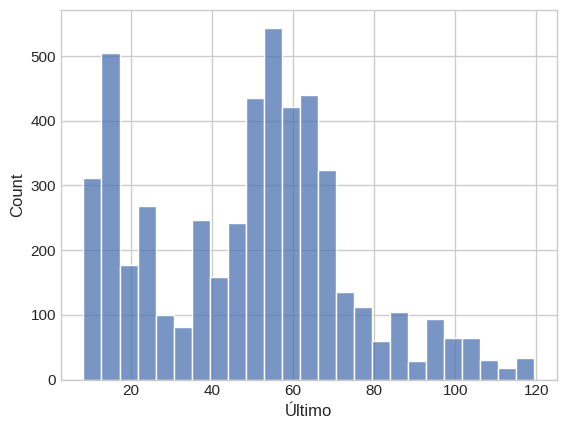

In [ ]:
sns.histplot(data= df, x = "Último")

<Axes: >

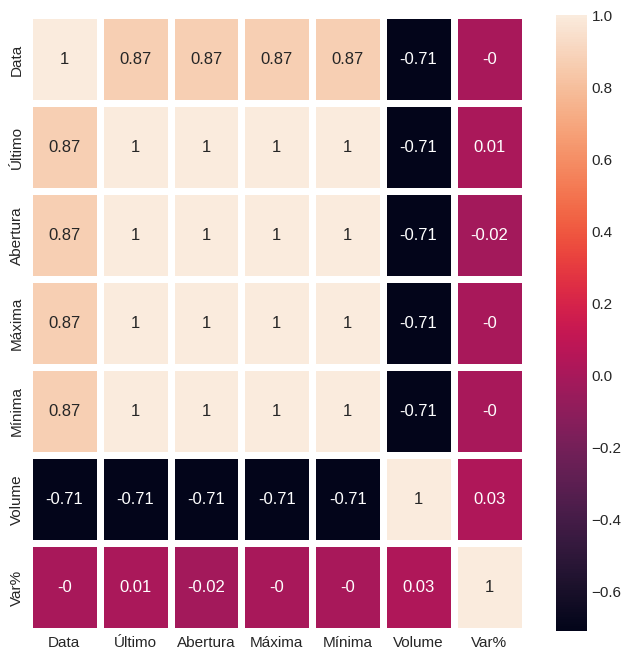

In [ ]:
correlation_matriz = df.corr().round(2)

fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(data = correlation_matriz, annot = True, linewidths = 5, ax = ax)

### **Análise da série temporal - Fechamento da Ibovespa conforme o tempo**

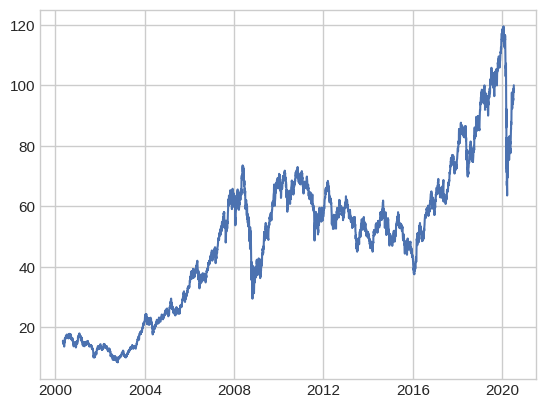

In [ ]:
plt.plot(df.Data, df.Último)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
analises = seasonal_decompose(df["Último"], model="aditivo", period=12)

<ipython-input-722-eca54759806d>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


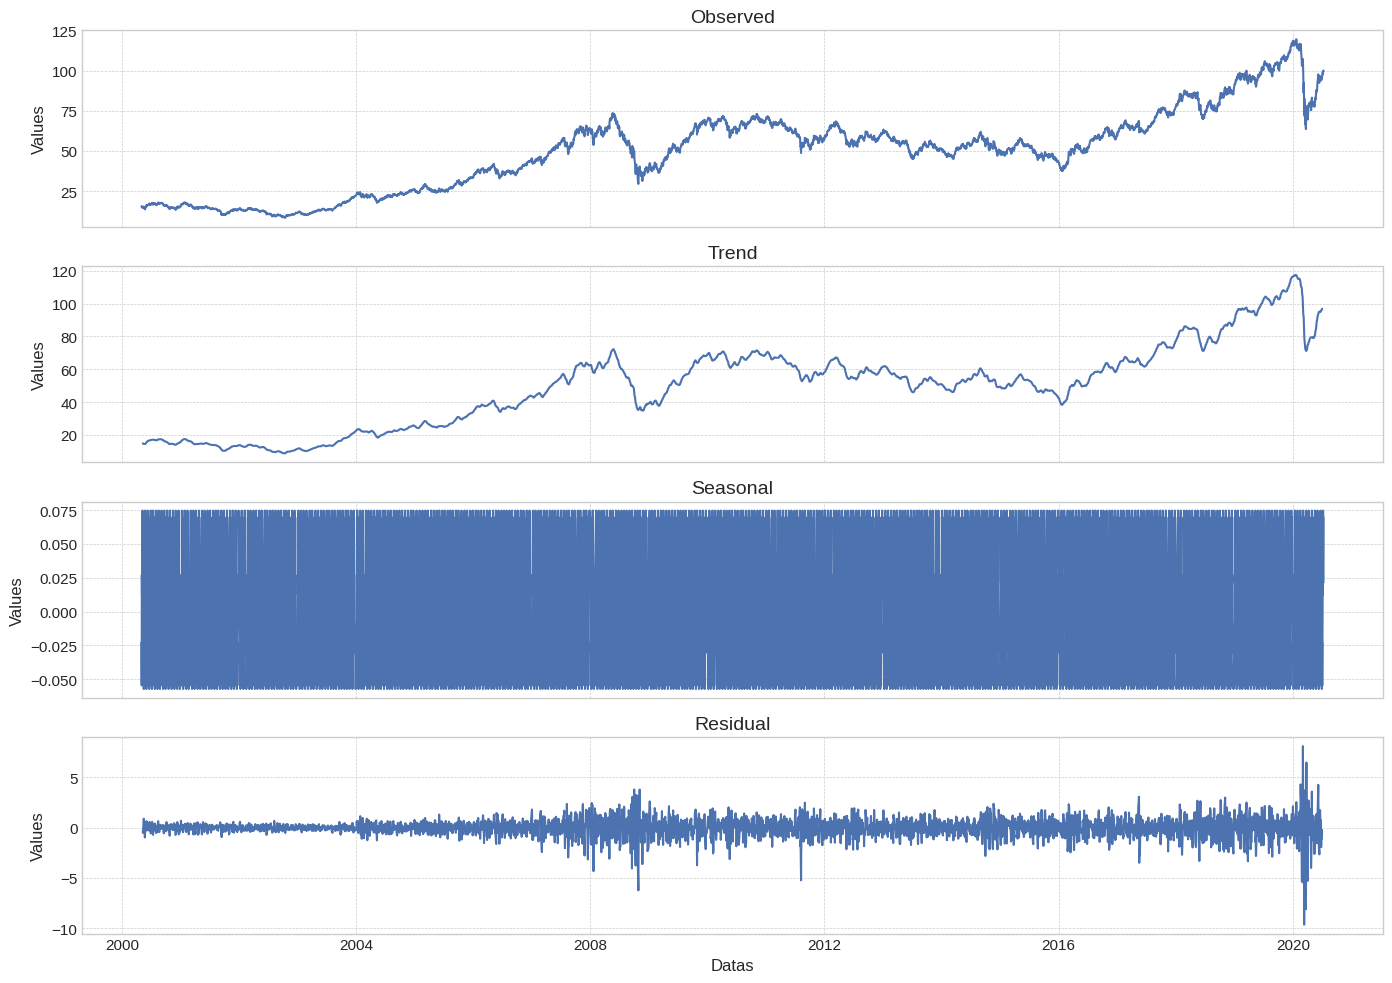

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

plt.style.use('seaborn-whitegrid')

ax1.plot(df['Data'], analises.observed, linestyle='-')
ax1.set_title('Observed', fontsize=14)
ax1.set_ylabel('Values', fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

ax2.plot(df['Data'], analises.trend, linestyle='-')
ax2.set_title('Trend', fontsize=14)
ax2.set_ylabel('Values', fontsize=12)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

ax3.plot(df['Data'], analises.seasonal, linestyle='-')
ax3.set_title('Seasonal', fontsize=14)
ax3.set_ylabel('Values', fontsize=12)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

ax4.plot(df['Data'], analises.resid, linestyle='-')
ax4.set_title('Residual', fontsize=14)
ax4.set_ylabel('Values', fontsize=12)
ax4.set_xlabel('Datas', fontsize=12)
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

### **Augmented Dickey-Fuller - Análise de Estacionaridade da série temporal**






In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
valores_ultimos = df.Último.values

In [ ]:
teste_adfuller = adfuller(valores_ultimos)

In [ ]:
print(f"Estatística do teste: {teste_adfuller[0]}")
print(f"Valor-p: {teste_adfuller[1]}")

Estatística do teste: -1.6389105310008945
Valor-p: 0.46283012866349665


### **Modelo preditivo - Forecast do fechamento diário da Ibovespa**